In [1]:
#Import libraries
import pandas as pd
import unicodecsv
import matplotlib as plt
import numpy as np
import datetime
from pprint import pprint

%matplotlib inline

In [2]:
# Enter date range to run information for.
# YYYY-MM-DD
Start_Date = '2021-01-01'
End_Date = '2021-03-31'

In [3]:
#Update variable with the file name
transactions_file = '/Users/knico/new-git-project/transaction.csv'


In [4]:
# Convert to pandas dataframe and print a few lines.
df = pd.read_csv(transactions_file)
print(df.head())
    
    

    Order Sale_Date      Type  Store_ID  Transaction_ID  SKU  Quantity  \
0  133429  2/2/2021  Delivery      1666             866  1TS     230.0   
1  132970  2/3/2021  Delivery      4736             624  R6E     372.0   
2  132685  2/4/2021  Delivery      6459             482  IEV     298.0   
3  133327  2/5/2021  Delivery      3719             810  C8Z     466.0   
4  133115  2/6/2021  Delivery      1253             708  8HU     360.0   

   Sales_Amount  Inventory  
0         37.38        156  
1          2.06        253  
2          4.96         82  
3          8.88        453  
4          2.76          8  


In [5]:
#Review data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133635 entries, 0 to 133634
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Order           133635 non-null  int64  
 1   Sale_Date       133635 non-null  object 
 2   Type            133635 non-null  object 
 3   Store_ID        133635 non-null  int64  
 4   Transaction_ID  133635 non-null  int64  
 5   SKU             133635 non-null  object 
 6   Quantity        133635 non-null  float64
 7   Sales_Amount    133635 non-null  float64
 8   Inventory       133635 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 9.2+ MB


In [6]:
def drop_columns(drop_list):
    """Function will drop any unwanted columns"""
    for col_name in drop_list:
        if col_name in df:
            df.drop(labels=col_name,axis=1 , inplace = True)
        else: 
            print(col_name ,"does not exist")
    

In [7]:
# Define list of columns to drop and call the function.
drop_list = ['Order','Transaction_ID']
drop_columns(drop_list)

In [32]:

def change_var_type(col_as_string, ctype):
    """This function will convert data types"""
    if ctype == 'string':
        #new_type = df[col_as_string].astype("|S")
        new_type = df[col_as_string].astype("string")
    if ctype == 'number':
        new_type = df[col_as_string].astype(int)
    if ctype == 'date':
       new_type = pd.to_datetime(df[col_as_string], format = '%Y-%m=%d')
     #   new_type = df[col_as_string].astype(date)
    return new_type

In [33]:
# Call the function to convert the data types. Convert to datetime.
df['Store_ID'] = change_var_type('Store_ID','string')

df['Sale_Date'] = change_var_type('Sale_Date', 'date')


In [34]:
# Data Frame is filtered by Dates in the Second Cell.
df = df.loc[(df['Sale_Date'] >= Start_Date) & (df['Sale_Date'] <= End_Date)]




In [35]:
df.describe(include='all')

C:\Users\knico\AppData\Local\Temp/ipykernel_2852/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Sale_Date,Type,Store_ID,SKU,Quantity,Sales_Amount,Inventory
count,33228,33228,33228,33228,33228.000000,33228.000000,33228.000000
unique,90,2,30,183,NaN,NaN,NaN
top,2021-03-09 00:00:00,Sale,1253,N8U,NaN,NaN,NaN
freq,415,32696,3448,2761,NaN,NaN,NaN
first,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,7.742546,11.994982,3.019532
std,NaN,NaN,NaN,NaN,51.452943,20.005149,28.830998
min,NaN,NaN,NaN,NaN,0.100000,0.020000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,4.230000,0.000000


In [36]:
#Add up the Sales by Location
data = df.groupby(['Store_ID']).sum()['Sales_Amount']
print(data)

Store_ID
1253    40642.84
1666    15491.25
2065     8410.91
2116    15723.41
2547     8748.81
3071    17337.90
3624     7754.88
3686     7306.76
3719     7770.81
3874    15322.26
4736    25197.49
4776     7739.62
4921     7558.03
5010     8692.70
5058     7838.11
5541    16114.45
5599    16345.65
5780     7877.77
592     17191.28
6044    16204.77
6294    25787.93
6450     9029.59
6459    17729.82
6865     7506.52
7548    15542.72
822      8694.99
8303     7908.29
8566     8313.73
9200     8402.68
9223    14383.30
Name: Sales_Amount, dtype: float64


In [37]:
# View the sales and deliveries by date
date_volume = df.groupby(['Sale_Date','Type']).sum()['Quantity']
print(date_volume)


Sale_Date   Type    
2021-01-01  Delivery    2358.00
            Sale         580.00
2021-01-02  Delivery    3382.00
            Sale         505.67
2021-01-03  Delivery    2092.00
                         ...   
2021-03-29  Sale         465.67
2021-03-30  Delivery    2426.00
            Sale         546.43
2021-03-31  Delivery    1891.00
            Sale         420.10
Name: Quantity, Length: 180, dtype: float64


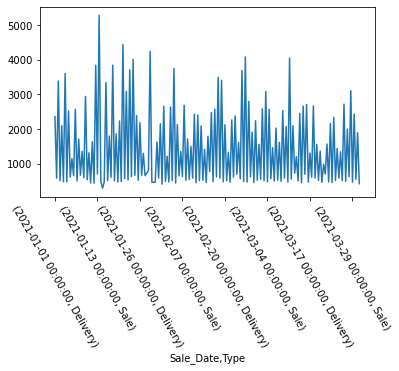

In [38]:
date_volume.plot()
plt.pyplot.xticks(rotation=300)
plt.pyplot.show()


In [39]:
DOS = df.set_index('Sale_Date')
DOS.index = pd.to_datetime(DOS.index)
print("No Sales on These dates")
k = pd.date_range(start=Start_Date, end = End_Date).difference(DOS.index);
pprint(k)

No Sales on These dates
DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [52]:
def customer_df(df, customer_number):
    
    customer_df = df[df['Store_ID'] == customer_number]
    
    customer_df = df[df['Type']== 'Sale']
    
    customer_df = customer_df.groupby(['Sale_Date','Type']).sum()['Quantity']
    
    
    
    customer_df.plot()
    plt.pyplot.title(customer_number, fontsize = 14) 
    plt.pyplot.xticks(rotation=90)
    plt.rcParams["figure.figsize"] = (7,3.5)
    plt.pyplot.show()
    
    
  
        
     

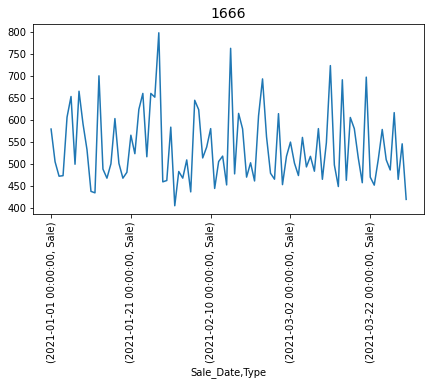

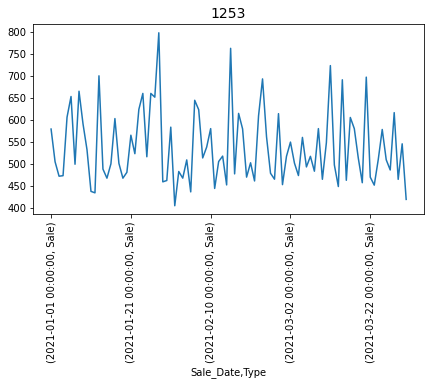

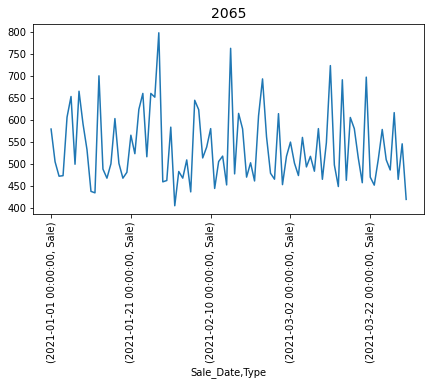

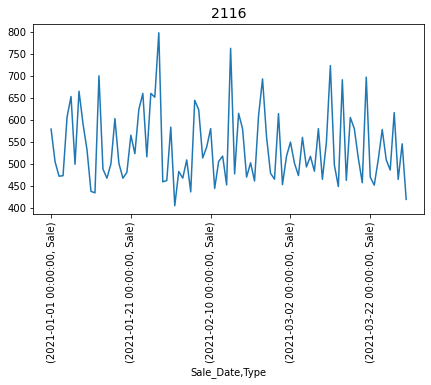

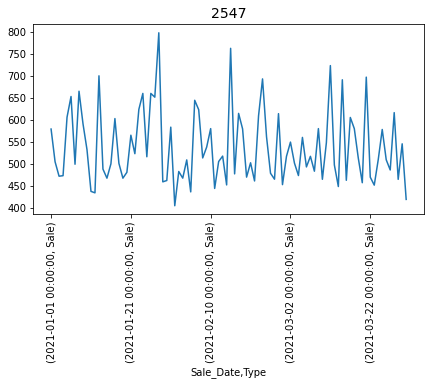

In [53]:
#Enter high risk stores here to get a visual on the sales. 

high_risk_list = ['1666','1253','2065','2116','2547']

for risk in high_risk_list:
    customer_df(df, risk)



References
https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/#:~:text=To%20filter%20rows%20based%20on%20dates%2C%20first%20format,subset%20of%20data%2C%20that%20is%2C%20the%20filtered%20DataFrame.